### In this tutorial, we will see different machine learning classifiers with a quick hands-on. We will see how different algorithms perform and their strengths and weaknesses and peculiarities.
### Lets dive in!


---



# Perceptron

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
print('class labes', np.unique(y))

class labes [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1,
                                                    stratify=y)

In [6]:
print('label counts in y:', np.bincount(y))

label counts in y: [50 50 50]


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [9]:
y_pred = ppn.predict(X_test_std)

In [10]:
print("Misclassified examples: %d" %(y_test != y_pred).sum())

Misclassified examples: 1


We can see that the perceptron misclassifies 1 out of the 45 flower examples.

Thus, the misclassification error on the test dataset is approximately 0.022, or 2.2 percent (1/45 ≈ 0.022)

Instead of the misclassification error, many machine learning practitioners report the
classification accuracy of a model, which is simply calculated as follows:
1–error = 0.978, or 97.8 percent

In [11]:
from sklearn.metrics import accuracy_score

print('Accuraccy: %.3f' % accuracy_score(y_test, y_pred) )

Accuraccy: 0.978


Alternatively, each classifier in scikit-learn has a score method, which computes a classifier’s prediction
accuracy by combining the predict call with accuracy_score

In [12]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


We will implement a plot_decision_regions function to plot the decision regions of our newly trained perceptron model and visualize how well it separates the different flower examples.

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):

  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

  # highlight test examples
  if test_idx:
  # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='Test set')

Next, we will combine our train and test dataset to visualize them through plot_decision_regions.

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

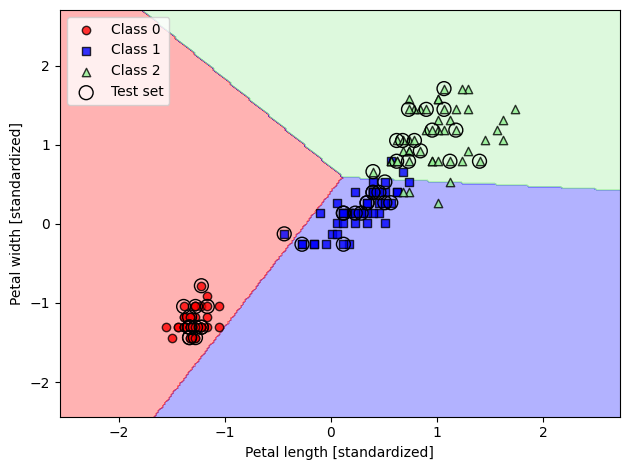

In [15]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

As we can see in the resulting plot, the three flower classes can’t be perfectly separated by a linear
decision boundary.


# Logistic regression

We will now take a look at another simple, yet more powerful, algorithm for linear and binary classification problems: logistic regression.


First, let's take a look at sigmoid function

Text(0, 0.5, '$\\sigma (z)$')

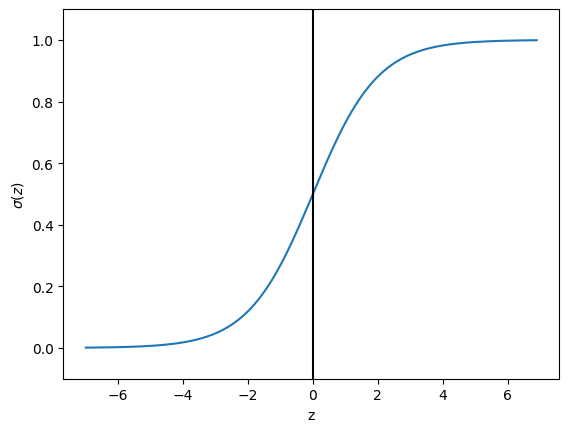

In [16]:
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

## Training a logistic regression model with scikit-learn

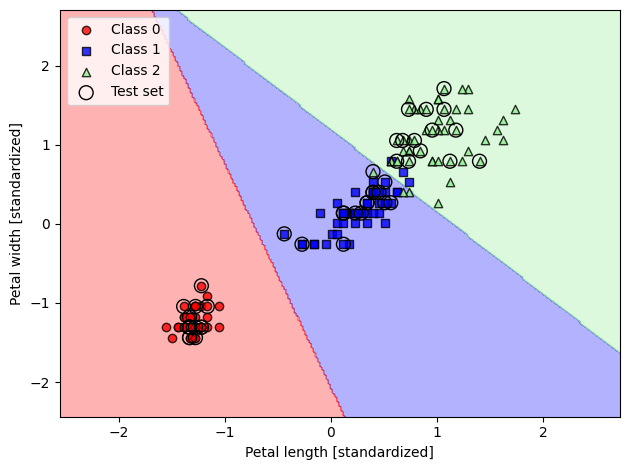

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 100.0, solver='lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined, classifier = lr,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from a convention in support vector machines, which will be the topic of the next section. The term C is inversely proportional to the regularization parameter, 𝜆. Consequently, decreasing the value of the
inverse regularization parameter, C, means that we are increasing the regularization strength.


The probability that training examples belong to a certain class can be computed using the predict_
proba method.

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In the preceding code example, we computed the conditional probabilities and converted these into
class labels manually by using NumPy’s argmax function. In practice, the more convenient way of
obtaining class labels when using scikit-learn is to call the predict method directly

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

If you want to predict the class label of a single flower example: scikit-learn
expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a
format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s
reshape method to add a new dimension.

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

# Support vector machines (SVMs)


In SVMs, our optimization objective is to maximize the margin.
The margin is defined as the distance between the separating hyperplane (decision boundary) and
the training examples that are closest to this hyperplane, which are the so-called support vectors.


The rationale behind having decision boundaries with large margins is that they tend to have a lower
generalization error, whereas models with small margins are more prone to overfitting.


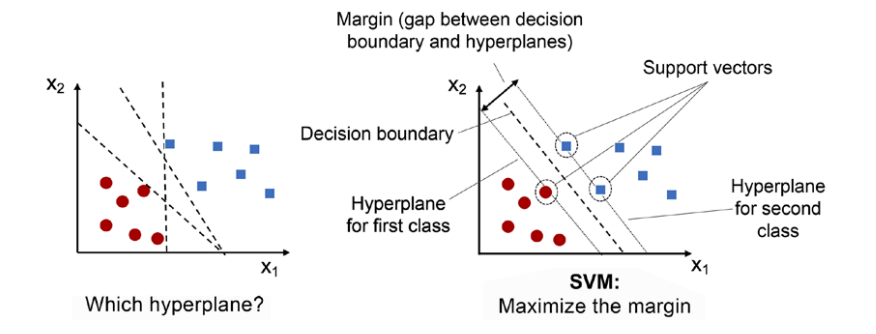

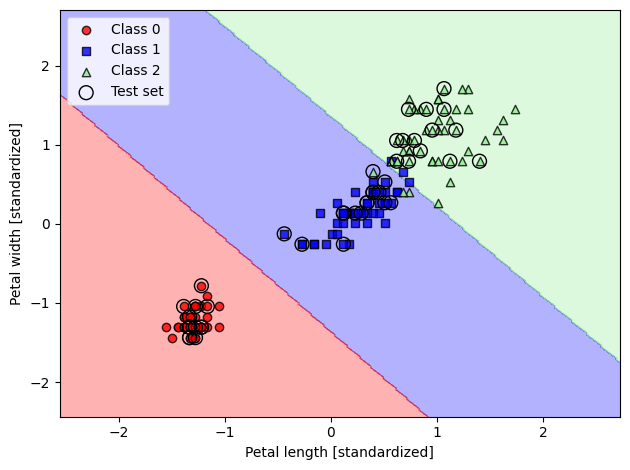

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier = svm,
                      test_idx = range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Scikit-learn also offers alternative implementations via the SGDClassifier class, which also supports online learning via the partial_fit
method. The concept behind the SGDClassifier class is similar to the stochastic gradient algorithm.


We could initialize the SGD version of the perceptron (loss='perceptron'), logistic regression
(loss='log'), and an SVM with default parameters (loss='hinge'), as follows:

In [23]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Nonlinear SVM

Let’s create a synthetic
dataset to see what such a nonlinear classification problem may look like.

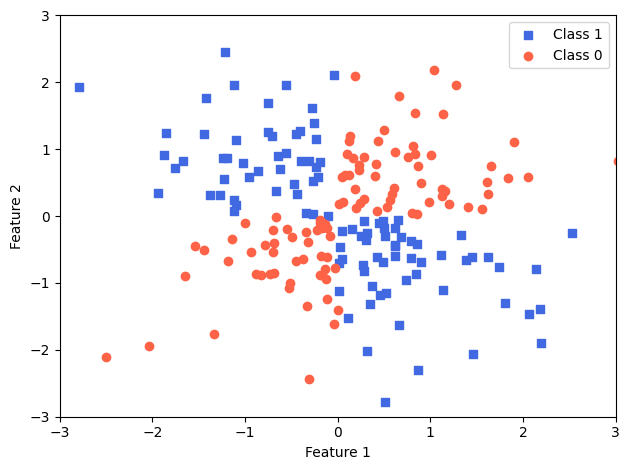

In [24]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)

y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Obviously, we would not be able to separate the examples from the positive and negative class very
well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM
model that we discussed in earlier sections.

The basic idea behind kernel methods for dealing with such linearly inseparable data is to create
nonlinear combinations of the original features to project them onto a higher-dimensional space via
a mapping function, 𝜙, where the data becomes linearly separable.

This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a
nonlinear decision boundary if we project it back onto the original feature space, as illustrated with
the following concentric circle dataset:
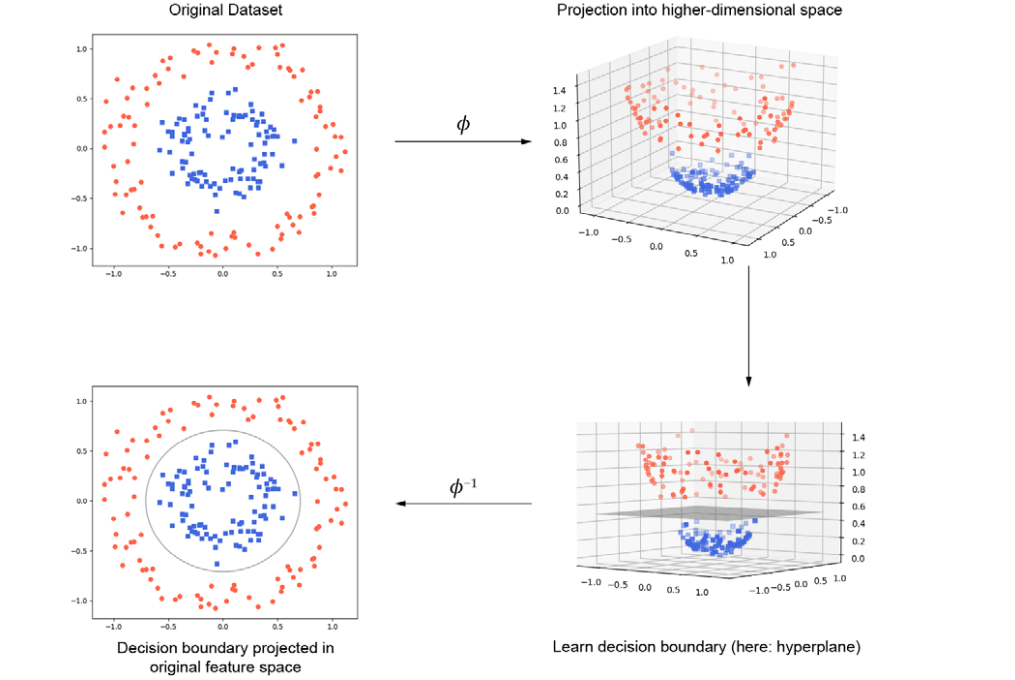

Now we will train a kernel SVM to that wil learn non-linear descision boundary.

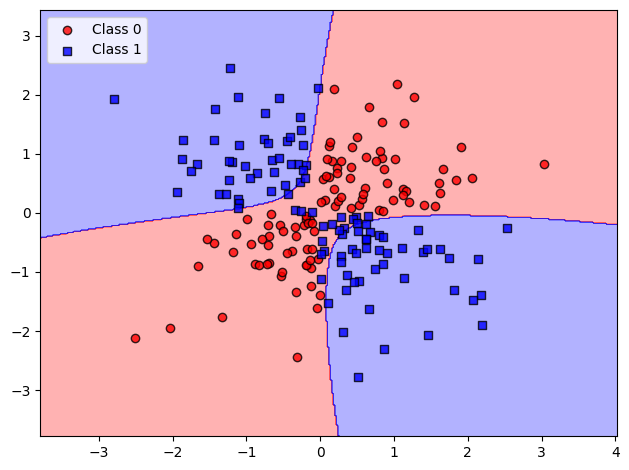

In [25]:
svm = SVC(kernel = 'rbf', gamma = 0.10, random_state  =1, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()

Now, let’s apply
an RBF kernel SVM to our Iris flower dataset

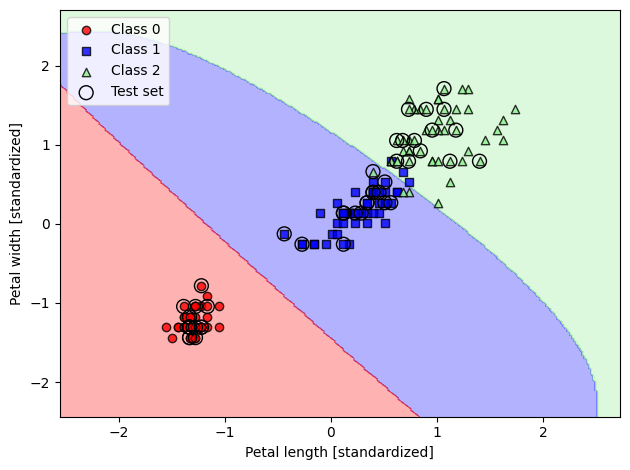

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

Since we chose a relatively small value for 𝛾, the resulting decision boundary of the RBF kernel SVM model will be relatively soft.
Now, let’s increase the value of 𝛾 and observe the effect on the decision boundary.

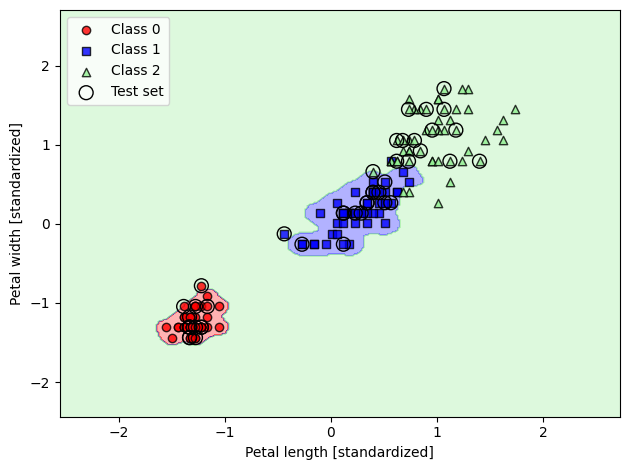

In [27]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the 𝛾 parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.




# Decision tree learning

Decision tree classifiers are attractive models if we care about interpretability.

Based on the features in our training dataset, the decision tree model learns a series of questions to
infer the class labels of the examples.




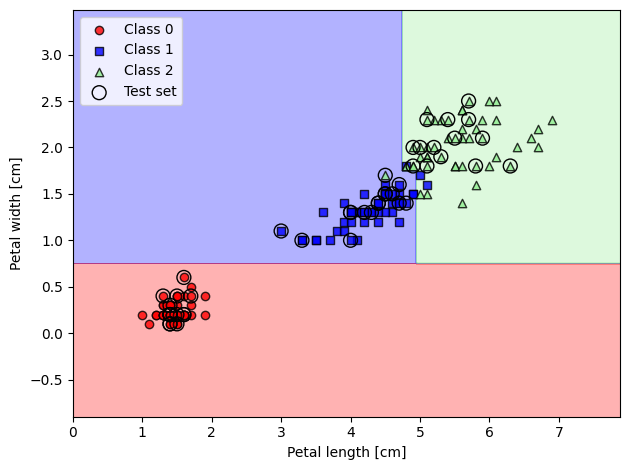

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 4,
                                    random_state = 1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined,
                      y_combined,
                      classifier = tree_model,
                      test_idx = range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after training via the following code:

[Text(0.25, 0.9, 'Sepal Width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.7, 'Sepal Length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'Sepal Width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'Sepal Length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'Sepal Length <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

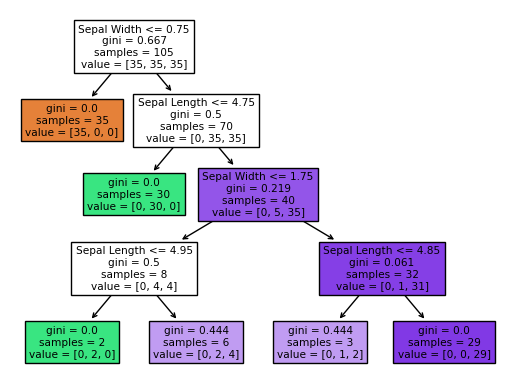

In [29]:
from sklearn import tree

feature_names = ['Sepal Length', 'Sepal Width',
                 "Petal Length", 'Petal Width']

tree.plot_tree(tree_model, feature_names = feature_names,
               filled = True)

## Random forests


 A random forest can be considered
as an ensemble of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance to build a more robust model that has a better
generalization performance and is less susceptible to overfitting.

Although random forests don’t offer the same level of interpretability as decision trees, a big advantage
of random forests is that we don’t have to worry so much about choosing good hyperparameter values.

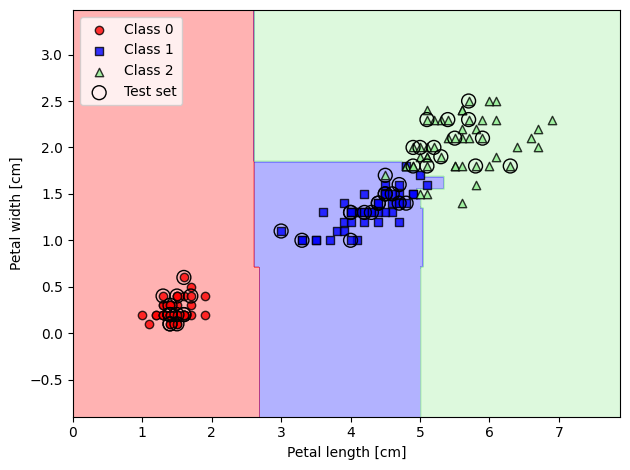

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 25,
                                random_state = 1,
                                n_jobs = 2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K-nearest neighbors – a lazy learning algorithm

KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.

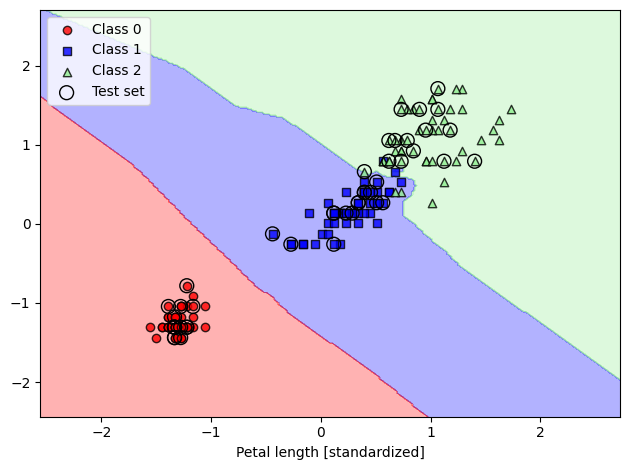

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p = 2, metric = 'minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn,
                      test_idx = range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Note: In the case of a tie, the scikit-learn implementation of the KNN algorithm will prefer
the neighbors with a closer distance to the data record to be classified. If the neighbors
have similar distances, the algorithm will choose the class label that comes first in the
training dataset.

The right choice of k is crucial to finding a good balance between overfitting and underfitting. We also
have to make sure that we choose a distance metric that is appropriate for the features in the dataset.

# **Summary**

In this notebook, we saw many different machine learning algorithms that are used to tackle linear and nonlinear problems. We have seen that decision trees are particularly attractive if we care
about interpretability. Logistic regression is not only a useful model for online learning via SGD, but
also allows us to predict the probability of a particular event.
Although SVMs are powerful linear models that can be extended to nonlinear problems via the kernel
trick, they have many parameters that have to be tuned in order to make good predictions. In contrast,
ensemble methods, such as random forests, don’t require much parameter tuning and don’t overfit as
easily as decision trees, which makes them attractive models for many practical problem domains. The
KNN classifier offers an alternative approach to classification via lazy learning that allows us to make
predictions without any model training, but with a more computationally expensive prediction step.